In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo csv
df = pd.read_csv("precios-en-surtidor-resolucin-3142016.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36942 entries, 0 to 36941
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indice_tiempo     36942 non-null  object 
 1   idempresa         36942 non-null  int64  
 2   cuit              36942 non-null  object 
 3   empresa           36942 non-null  object 
 4   direccion         36942 non-null  object 
 5   localidad         36942 non-null  object 
 6   provincia         36942 non-null  object 
 7   region            30553 non-null  object 
 8   idproducto        36942 non-null  int64  
 9   producto          36942 non-null  object 
 10  idtipohorario     36942 non-null  int64  
 11  tipohorario       36942 non-null  object 
 12  precio            36942 non-null  float64
 13  fecha_vigencia    36942 non-null  object 
 14  idempresabandera  36942 non-null  int64  
 15  empresabandera    36942 non-null  object 
 16  latitud           36930 non-null  float6

In [36]:
# Eliminar columnas innecesarias
df = df.drop(columns=['idempresa', 'cuit', 'empresa', 'direccion', 'idproducto', 'idtipohorario', 'idempresabandera'])

# Arreglar formatos incorrectos
df["indice_tiempo"] = pd.to_datetime(df["indice_tiempo"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36942 entries, 0 to 36941
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   indice_tiempo   36942 non-null  datetime64[ns]
 1   localidad       36942 non-null  object        
 2   provincia       36942 non-null  object        
 3   region          30553 non-null  object        
 4   producto        36942 non-null  object        
 5   tipohorario     36942 non-null  object        
 6   precio          36942 non-null  float64       
 7   fecha_vigencia  36942 non-null  object        
 8   empresabandera  36942 non-null  object        
 9   latitud         36930 non-null  float64       
 10  longitud        36930 non-null  float64       
 11  geojson         36930 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 3.4+ MB


In [37]:
# Revisar si hay valores faltantes
print(df.isnull().sum())

# Eliminar filas con valores faltantes
df = df.dropna()

indice_tiempo        0
localidad            0
provincia            0
region            6389
producto             0
tipohorario          0
precio               0
fecha_vigencia       0
empresabandera       0
latitud             12
longitud            12
geojson             12
dtype: int64


In [38]:
# Estadísticas descriptivas
print(df.describe())

             precio       latitud      longitud
count  30551.000000  30551.000000  30551.000000
mean     210.829991    -33.400516    -61.612581
std       73.162275      4.127706      3.645985
min        7.000000    -54.815060    -72.338930
25%      191.400000    -34.782360    -64.266467
50%      220.100000    -33.896070    -60.679156
75%      256.100000    -31.460640    -58.555797
max      365.000000    -22.055820    -53.648260


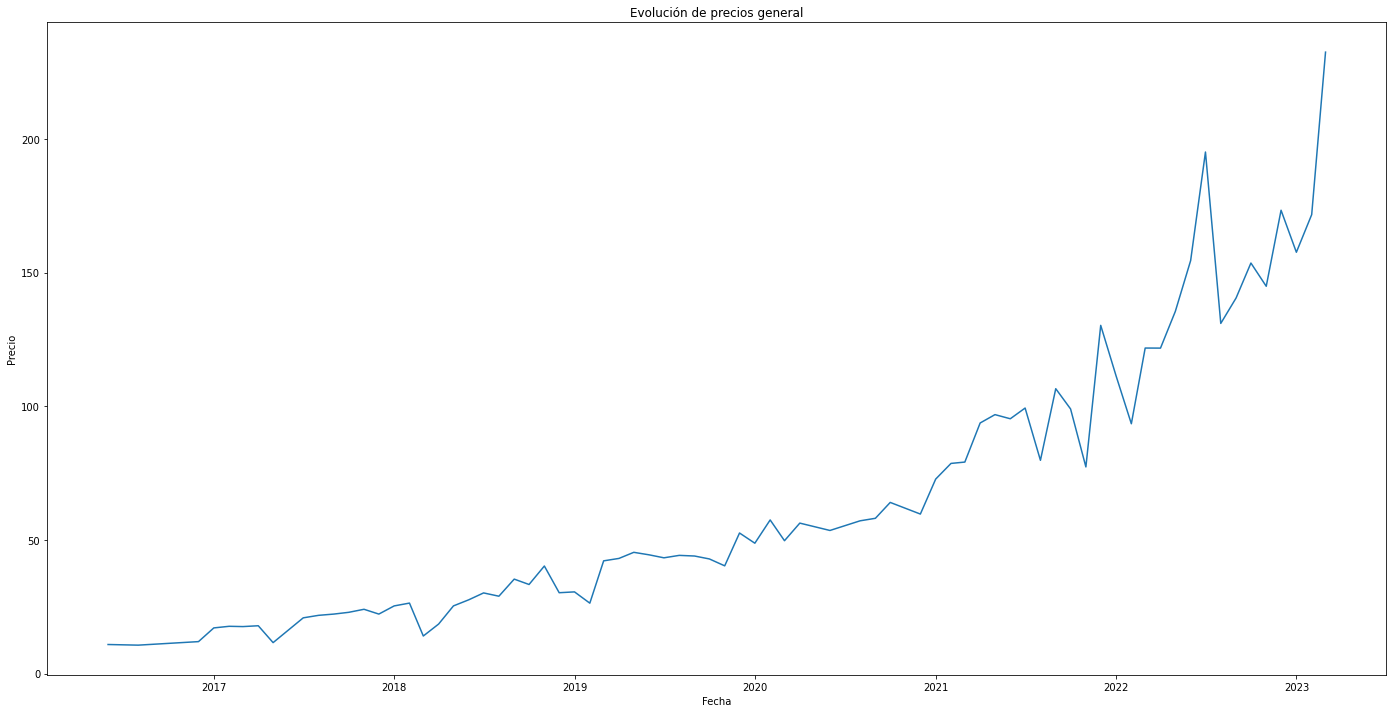

In [46]:
# Evolucion general de precios de todos los combustibles

# Agrupar los datos por fecha y calcular el promedio de los precios
df_prom_total = df.groupby("indice_tiempo")["precio"].mean().reset_index()

# Crear un gráfico de línea con la variable df_prom_total
plt.figure(figsize=(24, 12))
plt.plot(df_prom_total["indice_tiempo"], df_prom_total["precio"])

plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title("Evolución de precios general")
plt.show()


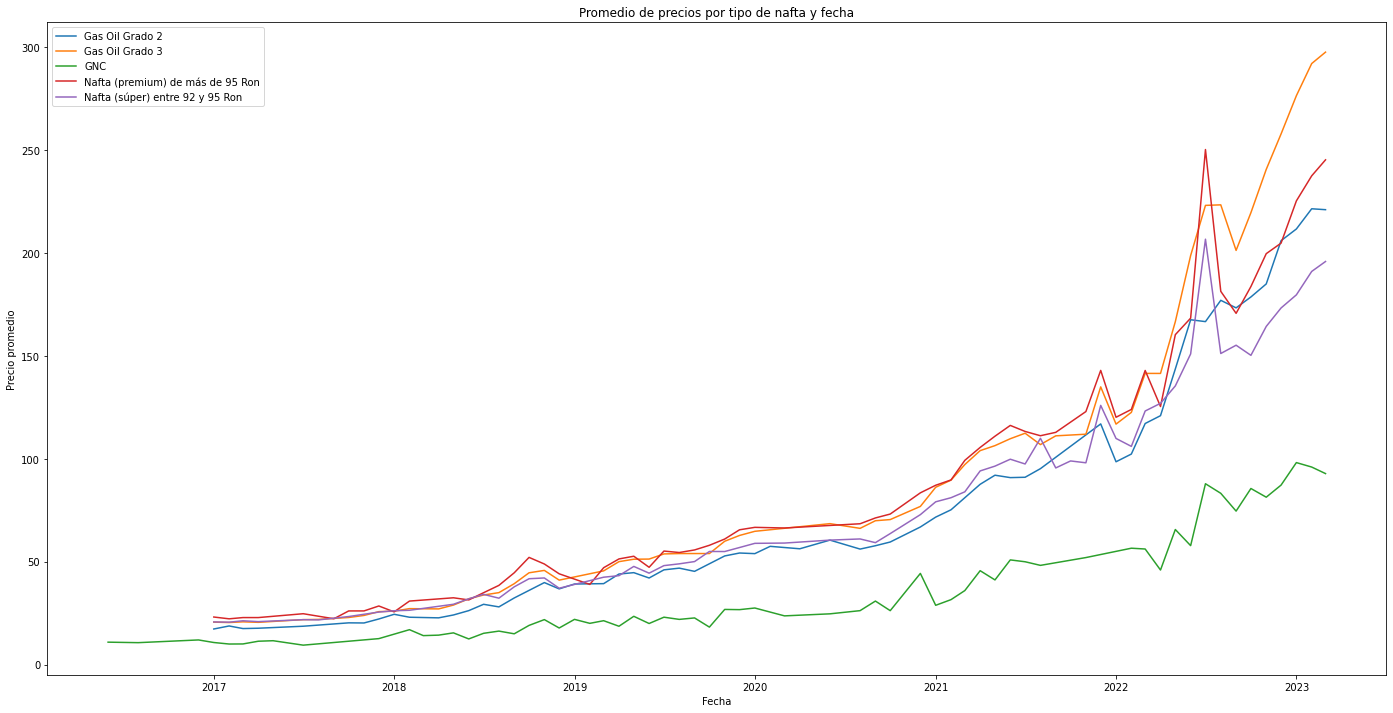

In [53]:
# Evolucion general de precio por tipo de combustible

# Agrupo los precios por tipo de combustible
prom_gas_oil_2_fecha = df.groupby(["producto", "indice_tiempo"])["precio"].mean()["Gas Oil Grado 2"]
prom_gas_oil_3_fecha = df.groupby(["producto", "indice_tiempo"])["precio"].mean()["Gas Oil Grado 3"]
prom_gnc_fecha = df.groupby(["producto", "indice_tiempo"])["precio"].mean()["GNC"]
prom_nafta_premium_fecha = df.groupby(["producto", "indice_tiempo"])["precio"].mean()["Nafta (premium) de más de 95 Ron"]
prom_nafta_super_fecha = df.groupby(["producto", "indice_tiempo"])["precio"].mean()["Nafta (súper) entre 92 y 95 Ron"]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(24,12))

# Agregar las líneas al gráfico
ax.plot(prom_gas_oil_2_fecha.index, prom_gas_oil_2_fecha.values, label="Gas Oil Grado 2")
ax.plot(prom_gas_oil_3_fecha.index, prom_gas_oil_3_fecha.values, label="Gas Oil Grado 3")
ax.plot(prom_gnc_fecha.index, prom_gnc_fecha.values, label="GNC")
ax.plot(prom_nafta_premium_fecha.index, prom_nafta_premium_fecha.values, label="Nafta (premium) de más de 95 Ron")
ax.plot(prom_nafta_super_fecha.index, prom_nafta_super_fecha.values, label="Nafta (súper) entre 92 y 95 Ron")

# Configurar el gráfico
ax.set_title("Promedio de precios por tipo de nafta y fecha")
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio promedio")
ax.legend()

# Mostrar el gráfico
plt.show()


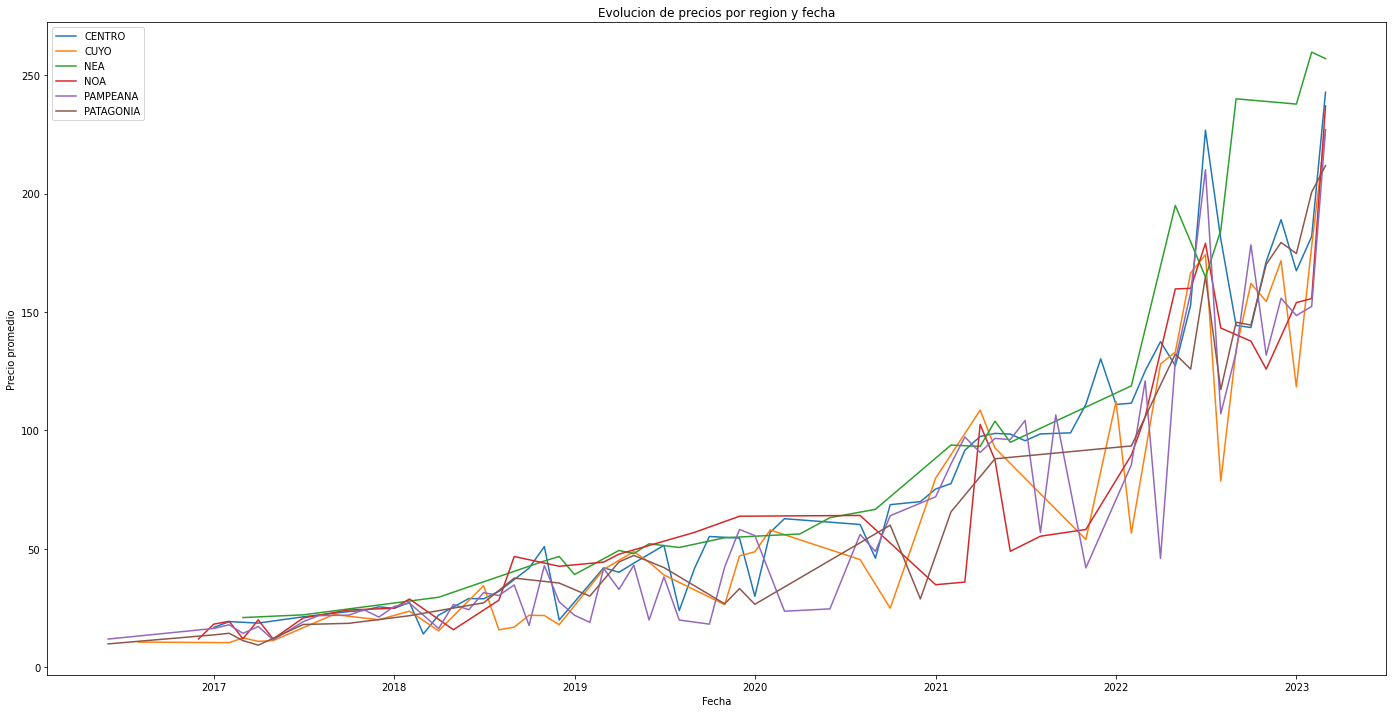

In [63]:
# Evolucion general de precio por region

# Agrupo los precios por region
prom_CENTRO_fecha = df.groupby(["region", "indice_tiempo"])["precio"].mean()["CENTRO"]
prom_CUYO_fecha = df.groupby(["region", "indice_tiempo"])["precio"].mean()["CUYO"]
prom_NEA_fecha = df.groupby(["region", "indice_tiempo"])["precio"].mean()["NEA"]
prom_NOA_fecha = df.groupby(["region", "indice_tiempo"])["precio"].mean()["NOA"]
prom_PAMPEANA_fecha = df.groupby(["region", "indice_tiempo"])["precio"].mean()["PAMPEANA"]
prom_PATAGONIA_fecha = df.groupby(["region", "indice_tiempo"])["precio"].mean()["PATAGONIA"]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(24,12))

# Agregar las líneas al gráfico
ax.plot(prom_CENTRO_fecha.index, prom_CENTRO_fecha.values, label="CENTRO")
ax.plot(prom_CUYO_fecha.index, prom_CUYO_fecha.values, label="CUYO")
ax.plot(prom_NEA_fecha.index, prom_NEA_fecha.values, label="NEA")
ax.plot(prom_NOA_fecha.index, prom_NOA_fecha.values, label="NOA")
ax.plot(prom_PAMPEANA_fecha.index, prom_PAMPEANA_fecha.values, label="PAMPEANA")
ax.plot(prom_PATAGONIA_fecha.index, prom_PATAGONIA_fecha.values, label="PATAGONIA")

# Configurar el gráfico
ax.set_title("Evolucion de precios por region y fecha")
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio promedio")
ax.legend()

# Mostrar el gráfico
plt.show()



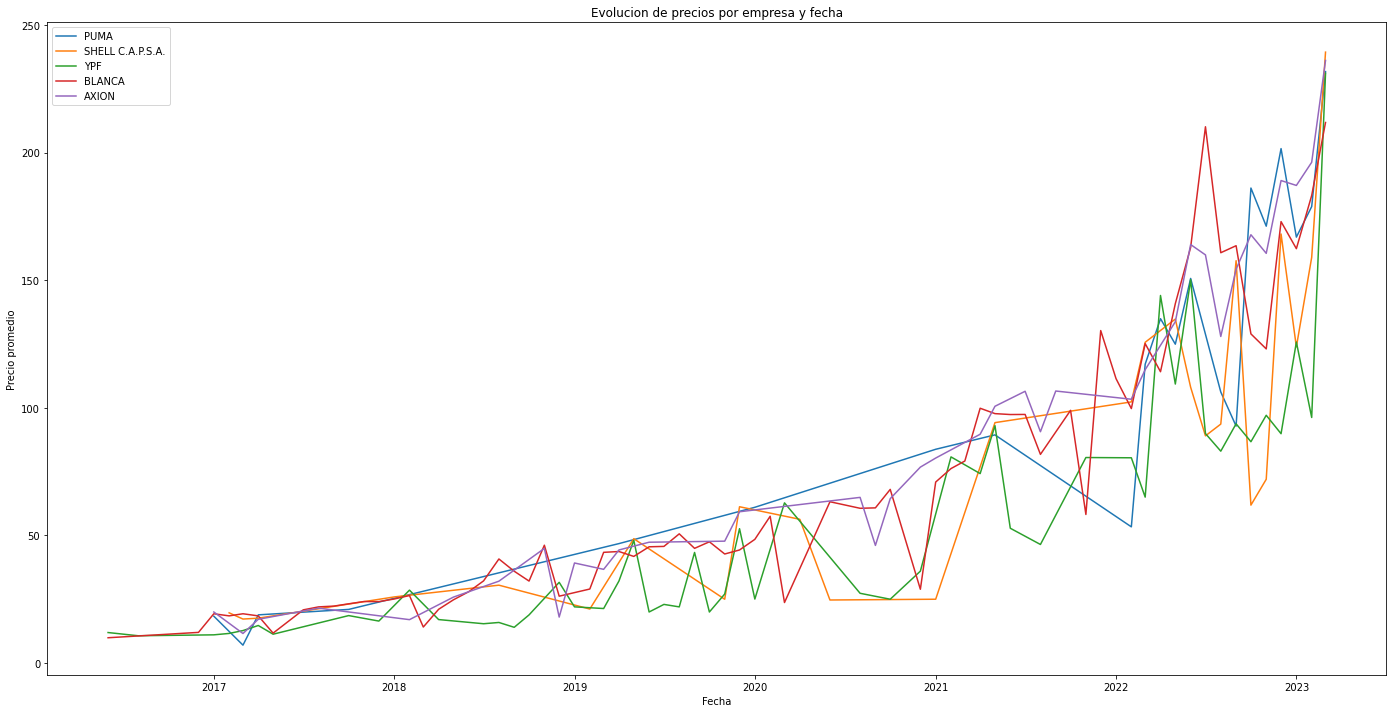

In [65]:
# Evolucion de precio por empresa 

# Agrupar los precios por empresa bandera y fecha
prom_PUMA_fecha = df.groupby(["empresabandera", "indice_tiempo"])["precio"].mean()["PUMA"]
prom_SHELL_fecha = df.groupby(["empresabandera", "indice_tiempo"])["precio"].mean()["SHELL C.A.P.S.A."]
prom_YPF_fecha = df.groupby(["empresabandera", "indice_tiempo"])["precio"].mean()["YPF"]
prom_BLANCA_fecha = df.groupby(["empresabandera", "indice_tiempo"])["precio"].mean()["BLANCA"]
prom_AXION_fecha = df.groupby(["empresabandera", "indice_tiempo"])["precio"].mean()["AXION"]
prom_GULF_fecha = df.groupby(["empresabandera", "indice_tiempo"])["precio"].mean()["GULF"]
prom_REFINOR_fecha = df.groupby(["empresabandera", "indice_tiempo"])["precio"].mean()["REFINOR"]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(24,12))

# Agregar las líneas al gráfico
ax.plot(prom_PUMA_fecha.index, prom_PUMA_fecha.values, label="PUMA")
ax.plot(prom_SHELL_fecha.index, prom_SHELL_fecha.values, label="SHELL C.A.P.S.A.")
ax.plot(prom_YPF_fecha.index, prom_YPF_fecha.values, label="YPF")
ax.plot(prom_BLANCA_fecha.index, prom_BLANCA_fecha.values, label="BLANCA")
ax.plot(prom_AXION_fecha.index, prom_AXION_fecha.values, label="AXION")

# Configurar el gráfico
ax.set_title("Evolucion de precios por empresa y fecha")
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio promedio")
ax.legend()

# Mostrar el gráfico
plt.show()
